In [1]:
#Inline magic command
%matplotlib inline
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np
import statistics


In [2]:
#files to load

city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [3]:
#create city and ride data frames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
#Get the columns and rows that are not null; df.count method is used
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
#to ensure no null exists, using isnull and sum 
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#check the data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
#unique values for the type of city
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Rural")
#sum(city_data_df["type"]=="Suburban")

18

In [8]:
#ensure no null data in ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
#columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
#data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
#merge the data frames; upon inspection it is clear city is the common column, let's use that column to merge the data frames

pyber_data_df = pd.merge(ride_data_df, city_data_df, how ="left", on = ["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:

#create data frame per type

urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]



In [13]:
#number of rides for urban, suburban and rural

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [14]:
#Average fare for each city in urban, suburban, rural

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [15]:
#average number of drives for each city in urban, suburban, rural

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

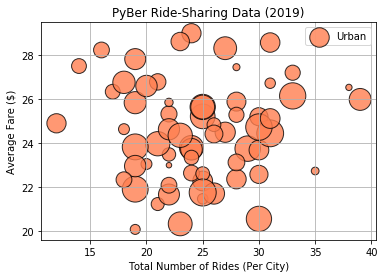

In [16]:
#Scatter plot for urban cities

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c= "coral", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

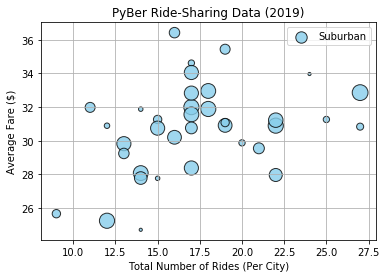

In [17]:
#Scatter plot for suburban cities

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c= "skyblue", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

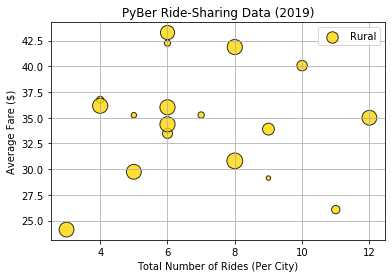

In [18]:
#Scatter plot for rural cities

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c= "gold", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

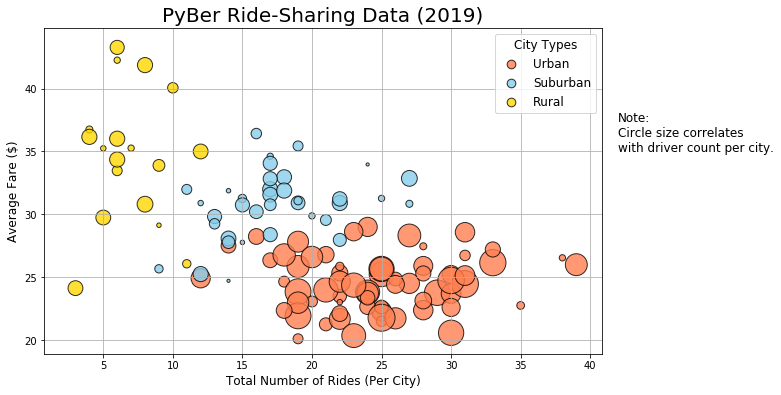

In [30]:
#add three charts to one cell to have one chart combining all these three.

plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c= "coral", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c= "skyblue", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c= "gold", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Rural")


#add graph properties

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize =12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)


#create a legend

lgnd = plt.legend(fontsize = "12", mode ="Expanded", 
                  scatterpoints = 1, loc = "best", title = "City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()